In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import prepState
from numpy import linalg as LA
from numpy import log as ln
from timeEvo import *
#from generateStates import *
from qutip import *


# for using tex formatting and font in plots
#"""
plt.rcParams.update({"text.usetex": True,}) 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage{lmodern}\inputencoding{utf8}\usepackage{amsmath}\usepackage{amssymb}\usepackage{dsfont}\usepackage{mathtools}\usepackage{physics}']
mpl.rc('font', **{'family':'sans-serif', 'size':11})
cmap = mpl.cm.get_cmap('viridis')#['viridis', 'plasma', 'inferno', 'magma', 'cividis']

In [231]:
## load quanitites

newbound_infos = []
newbound_bounds = []

newbound_bounds.append(np.loadtxt("txtfiles/newbound/newbound/12_corr_beta1=beta2_simpler.txt"))
newbound_bounds.append(np.loadtxt("txtfiles/newbound/newbound/12_corr_beta1=beta2_newbound.txt"))
newbound_infos.append(np.loadtxt("txtfiles/newbound/newbound/12_corr_beta1=beta2_info.txt"))


corr_12_fid         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/12_fidelity.txt")
corr_12_dkl         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/12_kld.txt")
corr_12_infoflow    = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/12_infoflow.txt")
corr_12_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/12_pendry.txt")

corr_23_fid         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/23_fidelity.txt")
corr_23_dkl         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/23_kld.txt")
corr_23_infoflow    = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/23_infoflow.txt")
corr_23_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/23_pendry.txt")

corr_34_fid         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/34_fidelity.txt")
corr_34_dkl         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/34_kld.txt")
corr_34_infoflow    = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/34_infoflow.txt")
corr_34_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/34_pendry.txt")

corr_45_fid         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/45_fidelity.txt")
corr_45_dkl         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/45_kld.txt")
corr_45_infoflow    = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/45_infoflow.txt")
corr_45_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/45_pendry.txt")

hom_kld = np.loadtxt("txtfiles/j_const/dkl.txt")[:1850]
hom_fid = np.loadtxt("txtfiles/j_const/fidelity.txt")[:1850]

perf_kld = np.loadtxt("txtfiles/j_var/dkl.txt")
perf_fid = np.loadtxt("txtfiles/j_var/fidelity.txt")

long_kld = np.loadtxt("txtfiles/longrange/kld.txt")
long_fid = np.loadtxt("txtfiles/longrange/fidelity.txt")
long_inf = np.loadtxt("txtfiles/longrange/infoflow.txt")
long_pen = np.loadtxt("txtfiles/longrange/pendrybound.txt")
long_max = np.loadtxt("txtfiles/longrange/maxfid.txt")

long_list = [long_kld, long_fid, long_inf, long_pen, long_max]

i_dot_sq_max_alpha  = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=0)
fid_max_alpha       = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=1)
bound_diff_max      = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=2)
alpha               = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=3)

maxima = [fid_max_alpha*1e-3, i_dot_sq_max_alpha, np.abs(bound_diff_max), alpha]

fidelities = [corr_12_fid, corr_23_fid, corr_34_fid, corr_45_fid]
dkls = [corr_12_dkl, corr_23_dkl, corr_34_dkl, corr_45_dkl]
#
infoflows = [corr_12_infoflow, corr_23_infoflow, corr_34_infoflow, corr_45_infoflow]
bounds = [corr_12_pendrybound, corr_23_pendrybound, corr_34_pendrybound, corr_45_pendrybound]

maxima_diff_beta = [[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]]]
beta_ratio = [[],[],[],[],[]]

#for k in range(2):
#    for j in range(5):
#        for i in range(4):
#            maxima_diff_beta[k][j].append(np.loadtxt("txtfiles/i_dot_sq_max/old_files/maxima_with_diff_beta"+str(k)+str(j)+".txt", usecols=i))
#    beta_ratio.append(np.round(1e4*np.loadtxt("txtfiles/i_dot_sq_max/old_files/maxima_with_diff_beta"+str(k)+str(j)+".txt", usecols=-2)[0]/np.loadtxt("txtfiles/i_dot_sq_max/old_files/maxima_with_diff_beta"+str(k)+str(j)+".txt", usecols=-1)[0])/10000)

n = 3199
dt = 1e-3
t = np.linspace(0, n*dt, n)
cm = 1/2.54

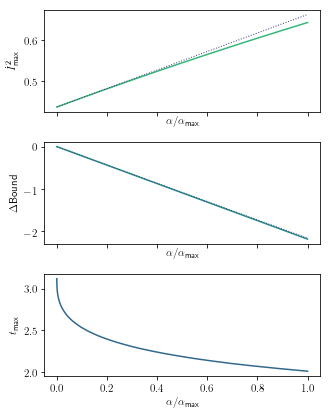

In [393]:
n=0
labels = [r"$t_\text{max}$", r"$\dot{I}^2_\text{max}$", r"$\displaystyle\abs{\min_{t\in[0,\pi]}{\frac{\pi}{3\ln^22}\dot{E}-\dot{I}^2}}$", r"$\alpha/\alpha_\text{max}$"]
#betalabel = r'$\Delta\beta ='
#i=0
#fig, ax = plt.subplots(figsize=(12*cm,5*cm))
#for k in [0,1]:
#    for j in range(1,5):
#        alpha = maxima_diff_beta[k][j][3]
#        fid_dings = maxima_diff_beta[k][j][1]
#        ax.plot(alpha, fid_dings*1e-3, label=str(i), color=cmap((i+2)/(4*2)))
#        i+=1
#        #ax.axhline(maxima_diff_beta[j][1][-1], color=cmap((j+1)/6), ls=':', lw=1)
#ax.plot(maxima[-1], maxima[n], label=labels[n], color=cmap(1/10))
#ax.set_ylabel(labels[n])
#ax.set_xlabel(labels[-1])
#ax.legend(loc='best')

#n+=1
fig, (ax1,ax2,ax0) = plt.subplots(3,sharex=True, figsize=(12*cm,15*cm))

alpha = maxima[3]
#plt.savefig("alltheplots/maxima/pos_of_first_fid_max.pdf")
n+=1

#fig, ax = plt.subplots(figsize=(12*cm,5*cm))

steigung = np.diff(maxima[n])/np.diff(alpha)
fitlabel = r'$\partial_\alpha \eval{\dot{I}^2_\text{max}}_{\alpha = 0} \cdot \alpha/\alpha_\text{max} + \eval{\dot{I}^2_\text{max}}_{\alpha = 0}$'
x=np.linspace(0,1,30)

ax1.plot(alpha, maxima[n], label=labels[n], color=cmap((4)/(6)))
ax1.plot(x, steigung[0]*x+maxima[n][0], color=cmap(1/6), label=fitlabel, ls=':', lw=1)
#ax.legend(loc=8, ncol=2)
#fig.subplots_adjust(bottom=.35)
ax1.set_ylabel(labels[n])
ax1.set_xlabel(labels[-1])
#plt.savefig("alltheplots/maxima/height_of_i_dot_sq_max.pdf")

n+=1
#fig, ax = plt.subplots(figsize=(12*cm,5*cm))
steigung = -1*np.diff(maxima[n])/np.diff(alpha)

ax2.plot(alpha, -1*maxima[n], label=labels[n], color=cmap((3)/(6)))
ax2.plot(x, steigung[0]*x+maxima[n][0], color=cmap(1/6), label=fitlabel, ls=':', lw=1)
#ax.legend(loc='best')
ax2.set_ylabel(r"$\Delta$Bound")
ax2.set_xlabel(labels[-1])

n=0

ax0.plot(alpha, maxima[n], label=labels[n], color=cmap((2)/(6)))
#ax.legend(loc='best')
ax0.set_ylabel(labels[n])
ax0.set_xlabel(labels[-1])

#fig.legend(loc=8,ncol=5)
fig.tight_layout()
#fig.subplots_adjust(bottom=.17)

plt.savefig("alltheplots/maxima/allofthem_equal_betas_with_failed_fits.pdf")
##ax.plot(maxima[-1], maxima[n], label=labels[n], color=cmap(1/6))
#ax.set_xlabel(labels[-1])
#ax.legend(loc='best')
##fig, ax0 = plt.subplots(figsize=(12*cm,5*cm))
##ax0.plot(alpha, maxima[n], label=labels[n], color=cmap(1/3))
##ax0.set_ylabel(labels[n])
##ax0.axvline(0, color='grey', ls=':')
##ax0.axhline(maxima[n][-1], color='grey', ls='--', lw=1)
#ax0.legend(loc='best')
#ax0.set_xlabel(labels[-1])
#plt.savefig("alltheplots/alpha/time_of_max_fid_beta1=beta2>>1.pdf")
#n+=2
#fig, ax0 = plt.subplots(figsize=(12*cm,7*cm))
#ax0.plot(alpha, maxima[n], label=labels[n], color=cmap(.2))
#ax0.set_xlim(-.05,1.05)
##a01.axvline(0, color='grey', ls=':')
##a01.axhline(maxima[n][-1], color='grey', ls='--')
#n-=1
#ax0.plot(alpha, maxima[n], label=labels[n], color=cmap(2/3))
#ax0.axvline(0, color='grey', ls='--')
#ax0.set_xlabel(labels[-1])
#ax0.axhline(0, color='grey', ls=':')
#fig.legend(loc=8, ncol=2)
#fig.subplots_adjust(bottom=.35)

In [ ]:
folder = "longrange"
#t = np.linspace(0,1.85,1850)
i=0
pos=3
corr_dkl = dkls[i]
i+=1
t=np.linspace(0,4.8,4800)
fig, (ax, ax1) = plt.subplots(2,sharex=True,figsize=(12*cm,10*cm))

ax.plot(t, long_fid[:4800], label=r"$F(\rho_N(t), \rho_1(0))$", color=cmap(1/3))
ax1.plot(t, long_kld[:4800], label=r"$S(\rho_1(0)\mid\mid\rho_N(t))$", color=cmap(2/3))
ax1.set_yscale('log')
ax1.set_xlabel(r'Time')
ax.set_ylabel(r'Fidelity')
ax1.set_ylabel(r'relative entropy')
#ax1.set_yticks([10, 1, .1])
#ax.set_yscale('log')
#ax.axvline(max_index*1e-3,color='grey', linewidth=1)
#ax1.axvline(max_index*1e-3,color='grey', linewidth=1)
#ax.axhline(0,color='grey', linewidth=1)
fig.legend(loc=8, ncol=2)
fig.tight_layout()
fig.subplots_adjust(bottom=.2)
plt.savefig("alltheplots/"+folder+"/"+str(pos)+"_fidelity_kld.pdf")

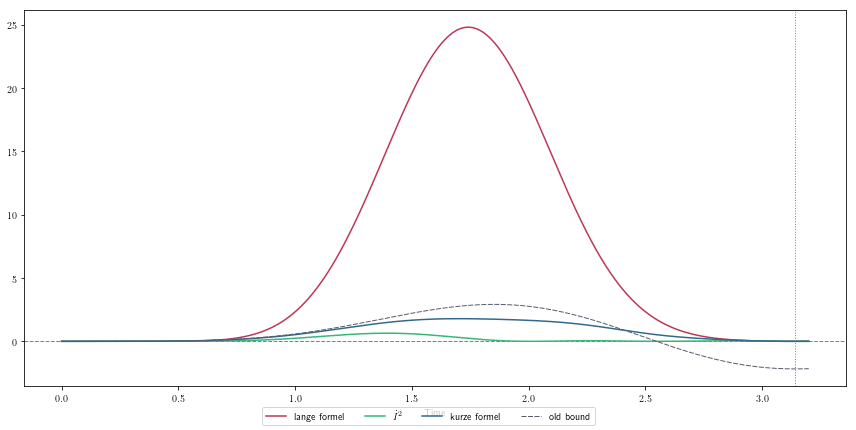

In [235]:
j = 0
pos = 2
folder = "newbound"
t=np.linspace(0,3.2,3199)
pendrybound = bounds[j]
fig, axs1= plt.subplots(figsize=(12,6))
#t=np.linspace(0,3.2,3199)
axs1.axhline(0, color="grey", ls='--', linewidth=1)
axs1.plot(t, newbound_bounds[1], label=r'lange formel', color=mpl.cm.get_cmap('inferno')(1/2), ls='-')
axs1.plot(t, newbound_infos[0], label=r"$\dot{I}^2$", color=cmap(2/3), ls='-')
axs1.plot(t, newbound_bounds[0], label=r"kurze formel", color=cmap(1/3), ls='-')
t=np.linspace(0,3.2,3200)
axs1.plot(t, bounds[0], label=r"old bound", color = mpl.cm.get_cmap('cividis')(1/3), ls=(0,(5,1.5)), lw=1)
#axs1.axvline(max_index_long*1e-3,color='grey', ls=':',linewidth=1)
axs1.axvline(np.pi, color='grey', ls=':', linewidth=1)
#axs1.axvline(long_list[-1][1]*1e-3, color='grey', ls=':', linewidth=1)

#axs1.plot(t, oldbound, label=r"old bound", color=cmap(1))
#axs1.set_ylim(-2,15)
#axs1.set_xlim(2.5, 2.65)
axs1.set_xlabel(r'Time')
#axs1.set_xlim()
fig.legend(loc=8, ncol=4)
fig.tight_layout()
#fig.subplots_adjust(bottom=.32)

plt.savefig("alltheplots/"+folder+"/corr12_beta1=beta2_simpler.pdf")

#plt.show()

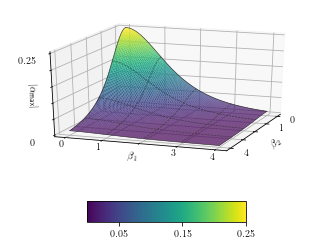

In [236]:
## surface plot
cm=1/2.54
from mpl_toolkits.mplot3d import Axes3D
from numpy import nan


def f(beta_one, beta_two):
    return 1/(4*np.cosh(beta_one)*np.cosh(beta_two))


fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12*cm,9*cm))

# Make data.
beta_one = np.linspace(0, 4, 500)
beta_two = np.linspace(0, 4, 500)
beta_one, beta_two = np.meshgrid(beta_one, beta_two)
#R = np.sqrt(X**2 + Y**2)
alpha = f(beta_one, beta_two)

xx = np.zeros(200)
zz = np.ones(200)*2
yy = np.linspace(0,4,200)

#xx, yy = np.meshgrid(xx, yy)

alpha_lines = [[xx,yy,f(xx,yy)], [yy,xx,f(yy,xx)], [zz*2, yy, f(zz*2,yy)], [yy,zz*2, f(yy,zz*2)],
                [zz,yy,f(zz,yy)], [zz*.5, yy, f(zz*.5,yy)], [zz*1.5, yy, f(zz*1.5,yy)],
                [yy,zz,f(yy,zz)], [yy,zz*.5, f(yy,zz*.5)], [yy,zz*1.5, f(yy,zz*1.5)]]
                
#, [yy, zz*.5, f(yy,zz*.5)]],[zz*.5, yy, f(zz*.5,yy)],[zz*1.5, yy, f(zz*1.5,yy)],
#[zz*1.5, yy, f(zz*1.5,yy)],[zz*2, yy, f(zz*2,yy)], [yy,zz*2, f(yy,zz*2)]]



testx, testy = np.diag(yy),np.diag(yy)


#middle_line = ax.plot(testy, testy, f(testy, testy), cmap=mpl.cm.get_cmap('inferno'), linewidth=0, antialiased = False)

#print(testy)
# Plot the surface.
surf = ax.plot_surface(beta_one, beta_two, alpha, cmap=cmap, linewidth=0, edgecolor=None, antialiaseds=True, rstride=5, cstride=5, alpha=1, zorder=1)
fig.colorbar(surf, shrink=0.5, aspect=7.5, orientation = 'horizontal', ticks=[.05,.15,.25])
#ax.contour(beta_one, beta_two, alpha, cmap=cmap, antialiased=True, alpha=.76,zorder=2)

alt_cmap = mpl.cm.get_cmap('Greys')
j=2
linestyles = ['-','-','-','-','--','--','--','--','--','--']
alphas = [.9, .9, .9, .9, .7, .7, .7, .7, .7, .7]
for i in alpha_lines:
    j+=1
    ax.plot(i[0], i[1],i[2], linestyles[j-3], color=alt_cmap((np.max(i[2])+2.5)/3), lw=.6, alpha=alphas[j-3], zorder=j)
# 
#from matplotlib.ticker import LinearLocator, StrMethodFormatter

# Customize the axes.
ax.set_zlim(0, .25)
ax.set_zlabel(r"$\abs{\alpha_\text{max}}$", labelpad=-11)
ax.set_xlabel(r"$\beta_2$", labelpad=-5)
ax.set_ylabel(r"$\beta_1$", labelpad=-7)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xticks([0, 1, 2, 3., 4])
ax.set_yticks([0, 1, 2, 3., 4])
ax.set_zticks([0, .05, .1, .15, .2, .25])
fontdict_y={'verticalalignment': 'bottom', 'horizontalalignment': 'left'}
fontdict_x={'verticalalignment': 'bottom', 'horizontalalignment': 'center'}
ax.set_xticklabels([r'$0$',r'$1$',r'',  r'', r'$4$'], fontdict=fontdict_x)
ax.set_yticklabels([r'$0$',r'$1$',' ', r'$3$', r'$4$'], fontdict=fontdict_y)
ax.set_zticklabels([r'$0$',r' ',' ', ' ', ' ', r'$0.25$'])
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically

#y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=True)

#ax.zaxis.set_major_formatter(StrMethodFormatter('{x:.02f}'))

ax.view_init(elev=22.5,azim=20)
# Add a color bar which maps values to colors.
fig.tight_layout()
plt.savefig("alltheplots/alpha/alphamax_3d_test.pdf")

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

[[0.25       0.         0.         ... 0.         0.         0.        ]
 [0.         0.249898   0.         ... 0.         0.         0.        ]
 [0.         0.         0.24959232 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01909141 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01836372 0.        ]
 [0.         0.         0.         ... 0.         0.         0.01766271]]


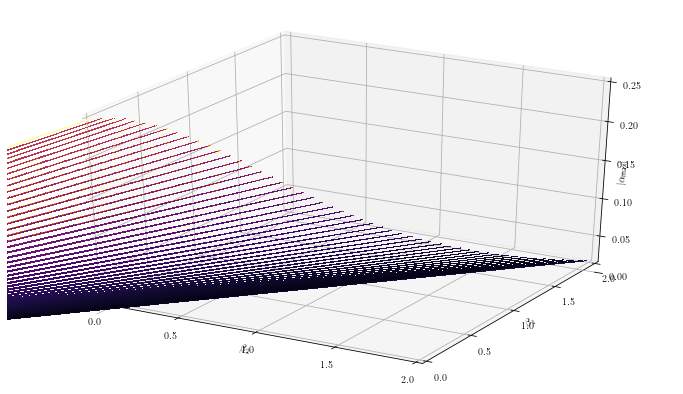

In [66]:

from numpy import inf


def f_0(x,y):
    out = np.diag(np.ones((100,)))
    for i in range(100):
        for j in range(100):
            if out[i][j]==1:
                out[i][j] = f(x,y)
            else:
                out[i][j] = inf
    return out


testx = np.linspace(0,2,100)
testy = np.linspace(0,2,100)

xx, yy = np.meshgrid(testx, testy)
xx = xx-3*(np.ones((100,100)) - np.diag(np.ones(100,)))
yy = yy-3*(np.ones((100,100)) - np.diag(np.ones(100,)))
print(np.diag(np.ones((100,))))
print()
print(np.diag(f(testy, testy)))
#alpha_lines = [[xx,yy,f(xx,yy)], [yy,xx,f(yy,xx)]]#, [yy[1:-1],yy[1:-1],f(yy[1:-1],yy[1:-1])+.0002]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,7))#, proj_type='ortho')
ax.plot_surface(xx, yy, np.diag(f(testy, testy)), cmap=mpl.cm.get_cmap('inferno'), linewidth=0, antialiased = False)

ax.set_zlim(.02, .25)
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlabel(r"$\abs{\alpha_\text{max}}$", labelpad=-11)
ax.set_xlabel(r"$\beta_2$", labelpad=-5)
ax.set_ylabel(r"$\beta_1$", labelpad=-7)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xticks([0, .5, 1, 1.5, 2.])
ax.set_yticks([0, .5, 1, 1.5, 2.])
ax.set_zticks([0, .05, .1, .15, .2, .25])

#testx, testy = np.meshgrid(xx, yy)


#iddle_line = ax.plot_surface(testy, testy, f(testy, testy), cmap=cmap, linewidth=0, antialiased = False)

#print(testy)
#print()
#print(testx)

In [ ]:
pats_data = np.loadtxt("patricks_shit/xd.txt", dtype=list, delimiter=', ')
i=0
for datum in pats_data:
    pats_data[i] = float(datum)
    i+=1

pat_cmap = mpl.cm.get_cmap('magma')#['viridis', 'plasma', 'inferno', 'magma', 'cividis']


def block_average(data, n):
    newdata = []
    i=0
    while i<len(data):
        average_of_n_block = np.mean(data[i:i+n])
        newdata.append(average_of_n_block)
        i+=n
    return newdata


def block_median(data, n):
    newdata = []
    i=0
    while i<len(data):
        median_of_n_block = np.median(data[i:i+n])
        newdata.append(median_of_n_block)
        i+=n
    return newdata


def kill_outliers(data, n, a):
    difference = np.diff(data)
    sigma = [np.std(difference[i:i+n]) for i in [j*n for j in range(int(len(difference)/n))]]
    i=1
    outliers=[]
    for delta in difference:
        k = int((i-1)/(n+1))
        k_next =int((i)/(n+1))
        if np.abs(difference[i-1])>a*sigma[k] and i<len(difference) and np.abs(difference[i]) > a*sigma[k_next]:
            outliers.append(i)
            i+=2
        elif np.abs(difference[i-1])>a*sigma[k] and i<len(difference) and np.abs(difference[i]) <= a*sigma[k_next]:
            outliers.append(i)
            i+=1
        elif np.abs(difference[i-1])<a*sigma[k] and i<len(difference):
            i+=1
        else:
            break
    i=0
    data = np.delete(data, outliers)
    return data


def ratio_of_data_inside(data, avg, std, a):
    N = len(data)
    i=0
    for datum in data:
        if datum > (avg-a*std) and datum < (avg+a*std):
            i+=1
    ratio = i/N
    return ratio


def get_a_for_sigma(data, avg, std, a):
    ratio = 0
    while ratio <= .95:
        ratio = ratio_of_data_inside(data, avg, std, a+.1)
    return a

n=30
pat_avg = block_average(pats_data, n)
pat_var = np.sqrt(block_average(np.square(pats_data), n) - np.square(pat_avg))

a = 1 #[get_a_for_sigma(pats_data[i:n+i], pat_avg[i], pat_var[i], 1) for i in range(len(pat_avg))]
i=0
i = np.abs(len(kill_outliers(pats_data, n, a))/len(pats_data))
while np.abs(len(kill_outliers(pats_data, n, a))/len(pats_data)) < .95 and i<100:
    a=(np.exp(-i)+1)*a
    i+=1/np.abs(len(kill_outliers(pats_data, n, a))/len(pats_data))
print(i)
print(a)
median_input_list = kill_outliers(pats_data, n, a)
pat_avg = block_average(median_input_list, n)
pat_med = block_median(median_input_list, n)
pat_var = block_average(np.square(median_input_list), n) - np.square(pat_avg)
pat_var_med = block_median(np.square(median_input_list), n) - np.square(pat_med)
avg_sigma_minus = -a*np.sqrt(pat_var) + pat_avg
avg_sigma_plus = a*np.sqrt(pat_var) + pat_avg

print(a, len(median_input_list), len(median_input_list)/len(pats_data))



In [ ]:
fig, (ax0, ax1) = plt.subplots(2, figsize=(12,9))


x = np.linspace(0, 4997, 4998, endpoint=True)
y = np.linspace(0, 4997, len(pat_avg), endpoint=True)
z = np.linspace(0, 4997, len(pat_med), endpoint=True)

ax0.plot(x, pats_data, '.', markersize=3, label=r'without shipping information', color=pat_cmap(.85))
ax1.plot(x, pats_data, '.', markersize=3, color=pat_cmap(.85))
ax0.plot(y, pat_avg, label=r'mean', color=pat_cmap(.01))
ax0.plot(y, avg_sigma_minus, color=pat_cmap(.5))
ax0.plot(y, avg_sigma_plus, color=pat_cmap(.5))
ax1.plot(z, pat_med, label=r'median', color=pat_cmap(.1))
ax1.set_xlabel(r'Training round')
ax1.set_ylabel(r'Agent reward median')
ax0.set_ylabel(r'Agent reward mean')
ax0.set_title(r'Agent convergence')

fig.legend(loc=8, ncol=3)
#fig.tight_layout()
fig.subplots_adjust(bottom=.1)

#filetypes = [".pdf", ".svg", ".png"]
#for type in filetypes:
#    plt.savefig("plots/patrick_average_median"+type)

In [ ]:
#axs1.set_xlim(0,1.8)
#axs1.set_ylim(-4,8)
#axs1.axhline(0, color="grey", linewidth=1)
#axs1.axvline(1.69, color="grey", linewidth=1)
#axs1.set_xlabel(r"Time")
#axs2.plot(t, Heatlim_perf_zero, label=r"$\frac{\pi}{3\ln(2)^2}\dot{E}$", color=cmap(1/3), linewidth=1)
#axs2.plot(t[:-1], infoFlow_perf_zero, label=r"$\dot{I}^2$", color=cmap(2/3), linewidth=2*.5)
#axs3.plot(t, diff, label=r"$\Delta \dot{E}$", color = cmap(.5))
#axs3.axhline(0, color="grey")
#axs2.axhline(0, color="grey")
#axs2.set_xlabel(r"Time")
#axs2.set_xlim(2,3.2)
#axs1.set_ylabel(r"Squared information flow and its bound")
#axs1.annotate(r"first 1", xy=(0.9,1), xytext=(0.8,0.95), arrowprops=dict(arrowstyle='->', facecolor='black'))
#axs1.text(0,0.96,r"a)")
#axs1.set_title(r"nicer plot", loc="right")

In [ ]:
def kill_outliers(data, n):
    difference = np.diff(data)
    diff_std_blocks = [np.std(difference[i:i+n]) for i in [j*n for j in range(int(len(difference)/n))]]
    i=1
    outliers=[]
    for datum in data:
        k = int((i-1)/(n+1))
        if np.abs(datum)>3*diff_std_blocks[k]:
            outliers.append(i)
        i+=1
    del outliers[-1]
    data = np.delete(data, outliers)
    return data


pats_data = np.loadtxt("patricks_shit/xd.txt", dtype=list, delimiter=', ')
i=0
for datum in pats_data:
    pats_data[i] = float(datum)
    i+=1

median_input_list = kill_outliers(pats_data, 30)
print(len(median_input_list), len(pats_data))